# Moving Average - MA

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas_ta as ta
import plotly.graph_objects as go

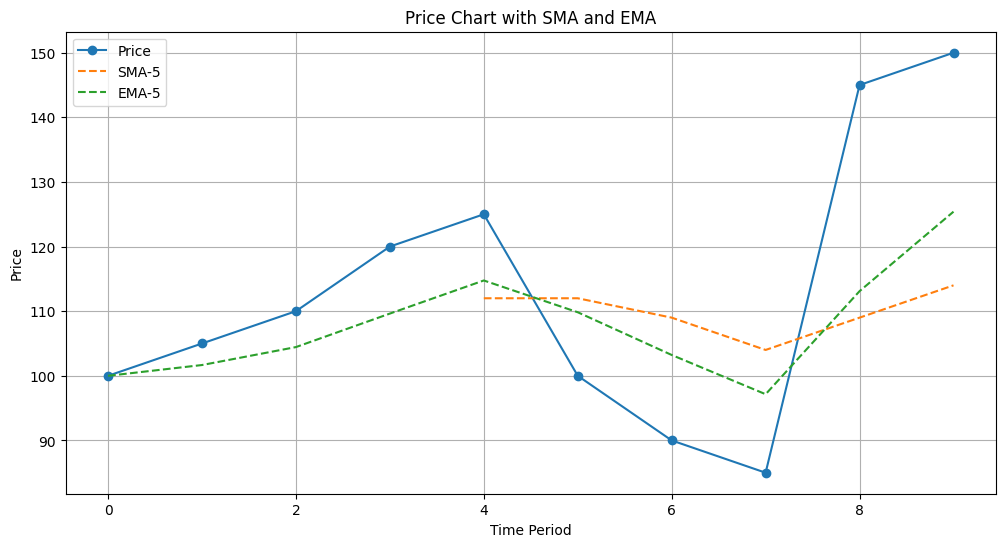

In [2]:
# Sample price data
prices = [100, 105, 110, 120, 125, 100, 90, 85, 145, 150]

# Calculate SMA and EMA
window = 5
sma = pd.Series(prices).rolling(window=window).mean()
ema = pd.Series(prices).ewm(span=window, adjust=False).mean()

# Plot the original price and moving averanges
plt.figure(figsize=(12, 6))
plt.plot(prices, label='Price', marker='o')
plt.plot(sma, label=f'SMA-{window}', linestyle='--')
plt.plot(ema, label=f'EMA-{window}', linestyle='--')

plt.title('Price Chart with SMA and EMA')
plt.xlabel('Time Period')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
df = yf.download(tickers='BTC-USD', period='max', interval='1d', auto_adjust=False)
df.columns = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
df

[*********************100%***********************]  1 of 1 completed


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2014-09-17,457.334015,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18,424.440002,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19,394.795990,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20,408.903992,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21,398.821014,398.821014,412.425995,393.181000,408.084991,26580100
...,...,...,...,...,...,...
2026-01-21,89376.960938,89376.960938,90430.406250,87231.570312,88326.507812,56330422434
2026-01-22,89462.453125,89462.453125,90258.960938,88438.445312,89378.523438,35549685694
2026-01-23,89503.875000,89503.875000,91100.250000,88486.359375,89462.046875,38997586037


# Average Directional Index - ADX

In [4]:
df.ta.adx(high='High', low='Low', close='Close', length=14, append=True)
df

,Adj Close,Close,High,Low,Open,Volume,ADX_14,ADXR_14_2,DMP_14,DMN_14
Date,,,,,,,,,,
2014-09-17,457.334015,457.334015,468.174011,452.421997,465.864014,21056800,NaN,NaN,NaN,NaN
2014-09-18,424.440002,424.440002,456.859985,413.104004,456.859985,34483200,NaN,NaN,NaN,NaN
2014-09-19,394.795990,394.795990,427.834991,384.532013,424.102997,37919700,NaN,NaN,NaN,NaN
2014-09-20,408.903992,408.903992,423.295990,389.882996,394.673004,36863600,NaN,NaN,NaN,NaN
2014-09-21,398.821014,398.821014,412.425995,393.181000,408.084991,26580100,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2026-01-21,89376.960938,89376.960938,90430.406250,87231.570312,88326.507812,56330422434,30.220407,31.715468,7319.833714,9509.014577
2026-01-22,89462.453125,89462.453125,90258.960938,88438.445312,89378.523438,35549685694,28.990985,30.267693,6796.988449,8829.799250
2026-01-23,89503.875000,89503.875000,91100.250000,88486.359375,89462.046875,38997586037,27.407029,28.813718,7152.778336,8199.099303


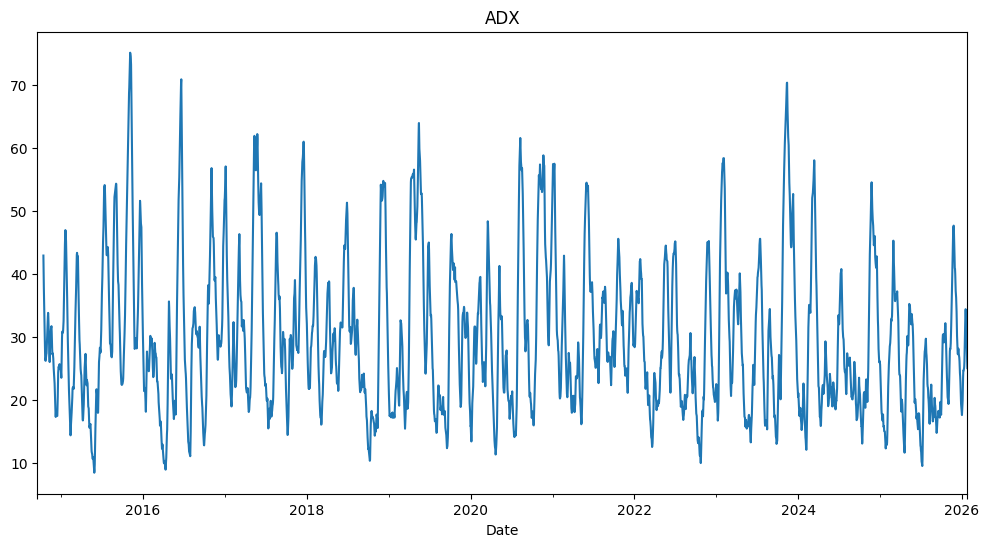

In [5]:
plt.figure(figsize=(12, 6))
plt.title('ADX')
df['ADX_14'].plot()
plt.show()

In [12]:
df = df[:500]
fig = go.Figure(
    data = [
        go.Candlestick(
            x = df.index,
            open = df['Open'],
            high = df['High'],
            low = df['Low'],
            close = df['Close'],
            name = 'OHLC'),
            go.Scatter(
                x = df.index,
                y = df['ADX_14'],
                name = 'ADX',
                yaxis = 'y2'
            )
    ]
)

fig.update_layout(
    title='OHLC with ADX_14',
    yaxis = dict(domain = [0.2, 1]),
    yaxis2 = dict(
        domain = [0, 0.2],
        anchor = 'free',
        overlaying = 'y',
        side = 'right',
        title = 'ADX'
    )
)

fig.show()